## Questions Asked

In [1]:
# - Do the stats of each pokemon generation inflate? Are generations balanced against eachother?
# - Are the pokemon balanced between "type1", eg. fire/grass etc.

# EDA (Exploratory data analysis):
# - Bivariate analysis: Pairwise plot of relationship between variables 

## Import needed tools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

## Read data and inspect content

In [3]:
original_data = pd.read_csv('pokemon.csv')
original_data.head()
pd.set_option('display.max_rows', None)

original_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
# Here we see that there are 800 entries, but only 721 unique pokemon
original_data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
# The dataset is complete with only the optional "Type 2" field containing Nulls
original_data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## Clean Data

In [6]:
# Some powerful pokemon have several entries (variations/special modes etc..)
# We don't want this to skew our data.
# Take average of stats for each pokemon (int)
cleaned_data = original_data.groupby('#').mean().astype(int).reset_index()
cleaned_data.tail()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
716,717,680,126,131,95,131,98,99,6,1
717,718,600,108,100,121,81,95,95,6,1
718,719,650,50,130,130,130,130,80,6,1
719,720,640,80,135,60,160,130,75,6,1
720,721,600,80,110,120,130,90,70,6,1


## Plot stats of all Pokemon in dataset

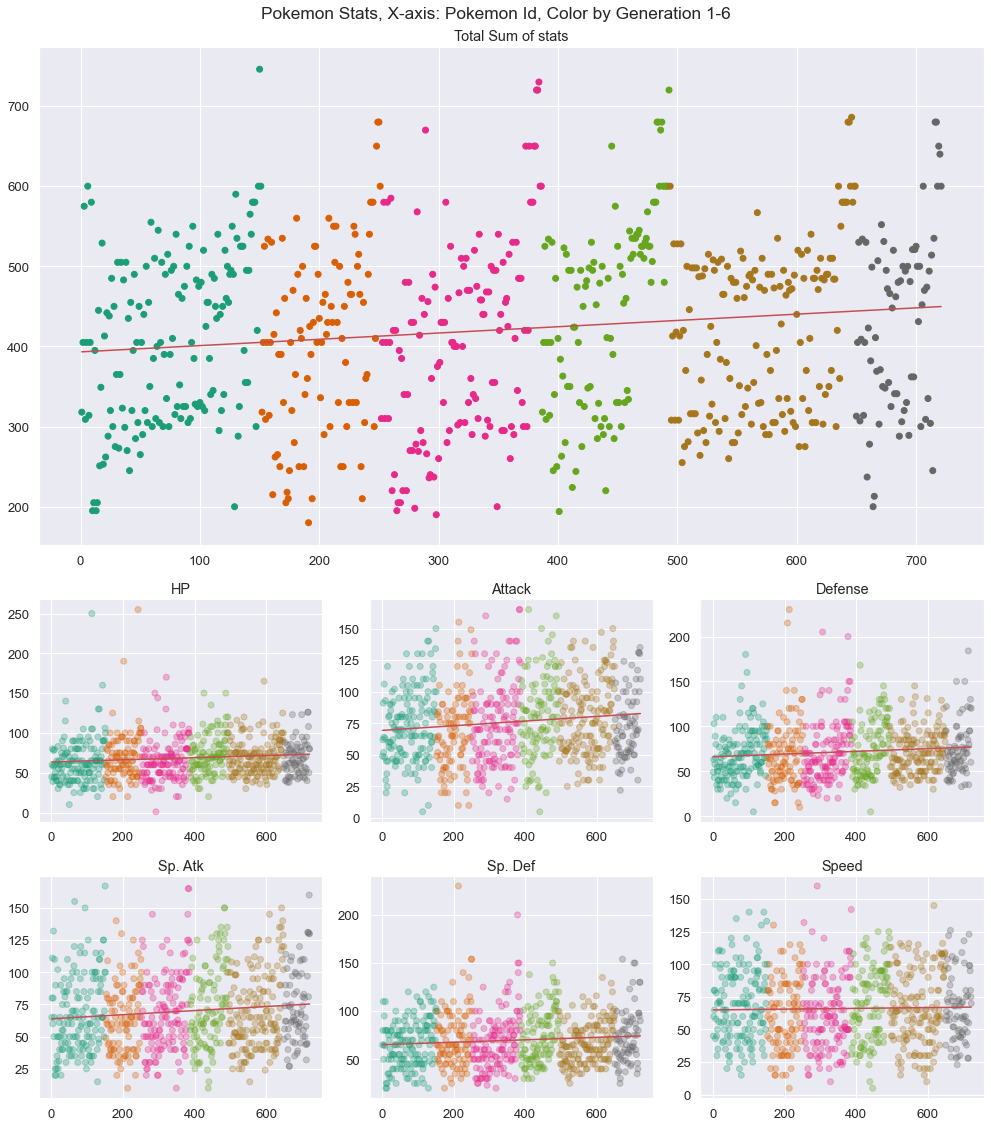

In [7]:
# plot all the numeric columns in subplots
fig = plt.figure(figsize=(14,16))
fig.suptitle('Pokemon Stats, X-axis: Pokemon Id, Color by Generation 1-6')

ax1 = plt.subplot2grid(shape=(4, 3), loc=(0, 0), colspan=3, rowspan=2)
ax2 = plt.subplot2grid(shape=(4, 3), loc=(2, 0))
ax3 = plt.subplot2grid(shape=(4, 3), loc=(2, 1))
ax4 = plt.subplot2grid(shape=(4, 3), loc=(2, 2))
ax5 = plt.subplot2grid(shape=(4, 3), loc=(3, 0))
ax6 = plt.subplot2grid(shape=(4, 3), loc=(3, 1))
ax7 = plt.subplot2grid(shape=(4, 3), loc=(3, 2))

# Adding linear fit to all plots to investigate inflation
def linear_fit(ax,x,y):
    b, m = np.polyfit(x, y, 1)
    polyfit = b * x + m
    ax.plot(x, polyfit,'r')

ax1.set_title('Total Sum of stats')

ax1.scatter(cleaned_data['#'], cleaned_data['Total'], c = cleaned_data['Generation'], cmap='Dark2')
linear_fit(ax1, cleaned_data['#'], cleaned_data['Total'])

ax2.set_title('HP')
ax2.scatter(cleaned_data['#'], cleaned_data['HP'], c = cleaned_data['Generation'], cmap='Dark2', alpha=0.3)
linear_fit(ax2, cleaned_data['#'], cleaned_data['HP'])

ax3.set_title('Attack')
ax3.scatter(cleaned_data['#'], cleaned_data['Attack'], c = cleaned_data['Generation'], cmap='Dark2', alpha=0.3)
linear_fit(ax3, cleaned_data['#'], cleaned_data['Attack'])

ax4.set_title('Defense')
ax4.scatter(cleaned_data['#'], cleaned_data['Defense'], c = cleaned_data['Generation'], cmap='Dark2', alpha=0.3)
linear_fit(ax4, cleaned_data['#'], cleaned_data['Defense'])

ax5.set_title('Sp. Atk')
ax5.scatter(cleaned_data['#'], cleaned_data['Sp. Atk'], c = cleaned_data['Generation'], cmap='Dark2', alpha=0.3)
linear_fit(ax5, cleaned_data['#'], cleaned_data['Sp. Atk'])

ax6.set_title('Sp. Def')
ax6.scatter(cleaned_data['#'], cleaned_data['Sp. Def'], c = cleaned_data['Generation'], cmap='Dark2', alpha=0.3)
linear_fit(ax6, cleaned_data['#'], cleaned_data['Sp. Def'])

ax7.set_title('Speed')
ax7.scatter(cleaned_data['#'], cleaned_data['Speed'], c = cleaned_data['Generation'], cmap='Dark2', alpha=0.3)
linear_fit(ax7, cleaned_data['#'], cleaned_data['Speed'])

# adjust padding 
plt.tight_layout()
plt.savefig('Pokemon_stats')
 

## Calculate mean for each type1 (fire/grass etc.), plot mean by type1

In [8]:
# These are the unique "Type 1" 
unique_type1 = list(original_data["Type 1"].unique())

# Make new dataframe with type1 as index
## Learned: Don't grow dataframes, grow lists then make df.
type1_means = []
for numeric_value in list(cleaned_data.columns):
    # Calculate mean for each type1, create series
    type1_mean = original_data.groupby('Type 1', as_index=True)[numeric_value].mean()
    type1_means.append(type1_mean)

In [9]:
# Make lists of lists into df
type1_means_df = pd.DataFrame(type1_means).transpose()

In [10]:
type1_means_df.round(1)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.5,378.9,56.9,71.0,70.7,53.9,64.8,61.7,3.2,0.0
Dark,461.4,445.7,66.8,88.4,70.2,74.6,69.5,76.2,4.0,0.1
Dragon,474.4,550.5,83.3,112.1,86.4,96.8,88.8,83.0,3.9,0.4
Electric,363.5,443.4,59.8,69.1,66.3,90.0,73.7,84.5,3.3,0.1
Fairy,449.5,413.2,74.1,61.5,65.7,78.5,84.7,48.6,4.1,0.1
Fighting,363.9,416.4,69.9,96.8,65.9,53.1,64.7,66.1,3.4,0.0
Fire,327.4,458.1,69.9,84.8,67.8,89.0,72.2,74.4,3.2,0.1
Flying,677.8,485.0,70.8,78.8,66.2,94.2,72.5,102.5,5.5,0.5
Ghost,486.5,439.6,64.4,73.8,81.2,79.3,76.5,64.3,4.2,0.1


<Figure size 1008x576 with 0 Axes>

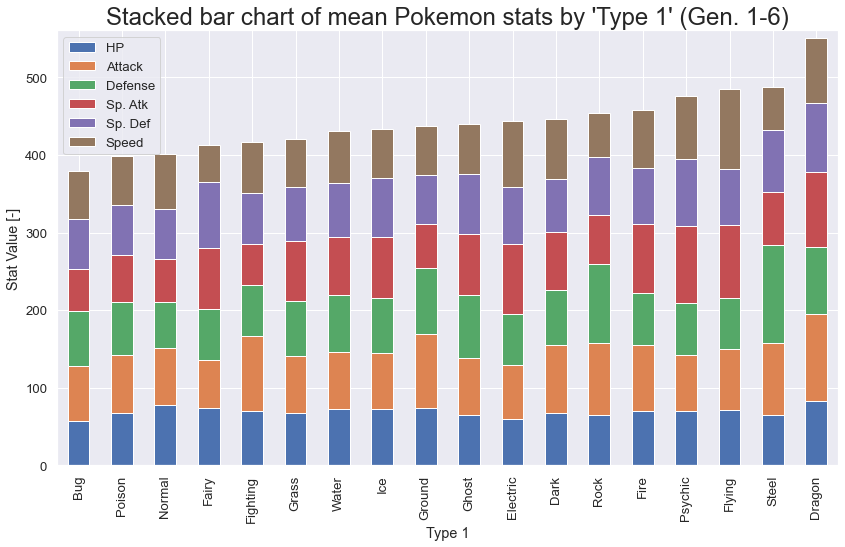

In [11]:
# Bar chart for categorical variable type1, x-axis: category type1 
plt.rcParams['figure.figsize'] = [14, 8]
fig2 = plt.figure()
#fig2.set_figheight(90)
#fig2.set_figwidth(10)
# Sort by Total stat THEN Drop columns 
type1_means_sorted_df = type1_means_df.sort_values(by = 'Total')
type1_means_sorted_df = type1_means_sorted_df.drop(['#', 'Total', 'Generation', 'Legendary'], axis=1)
# plot
ax = type1_means_sorted_df.plot.bar(stacked=True)

plt.title(f"Stacked bar chart of mean Pokemon stats by 'Type 1' (Gen. 1-6)", fontsize=24)
plt.xlabel('Type 1')
plt.ylabel("Stat Value [-]")
plt.ylim(0, max(type1_means_df['Total'])+10)
# plt.show()
plt.savefig('Mean_Pokemon_stats_by_Type_1')


## Pairwise plot (sns.pairplot())

<Figure size 11000x11000 with 0 Axes>

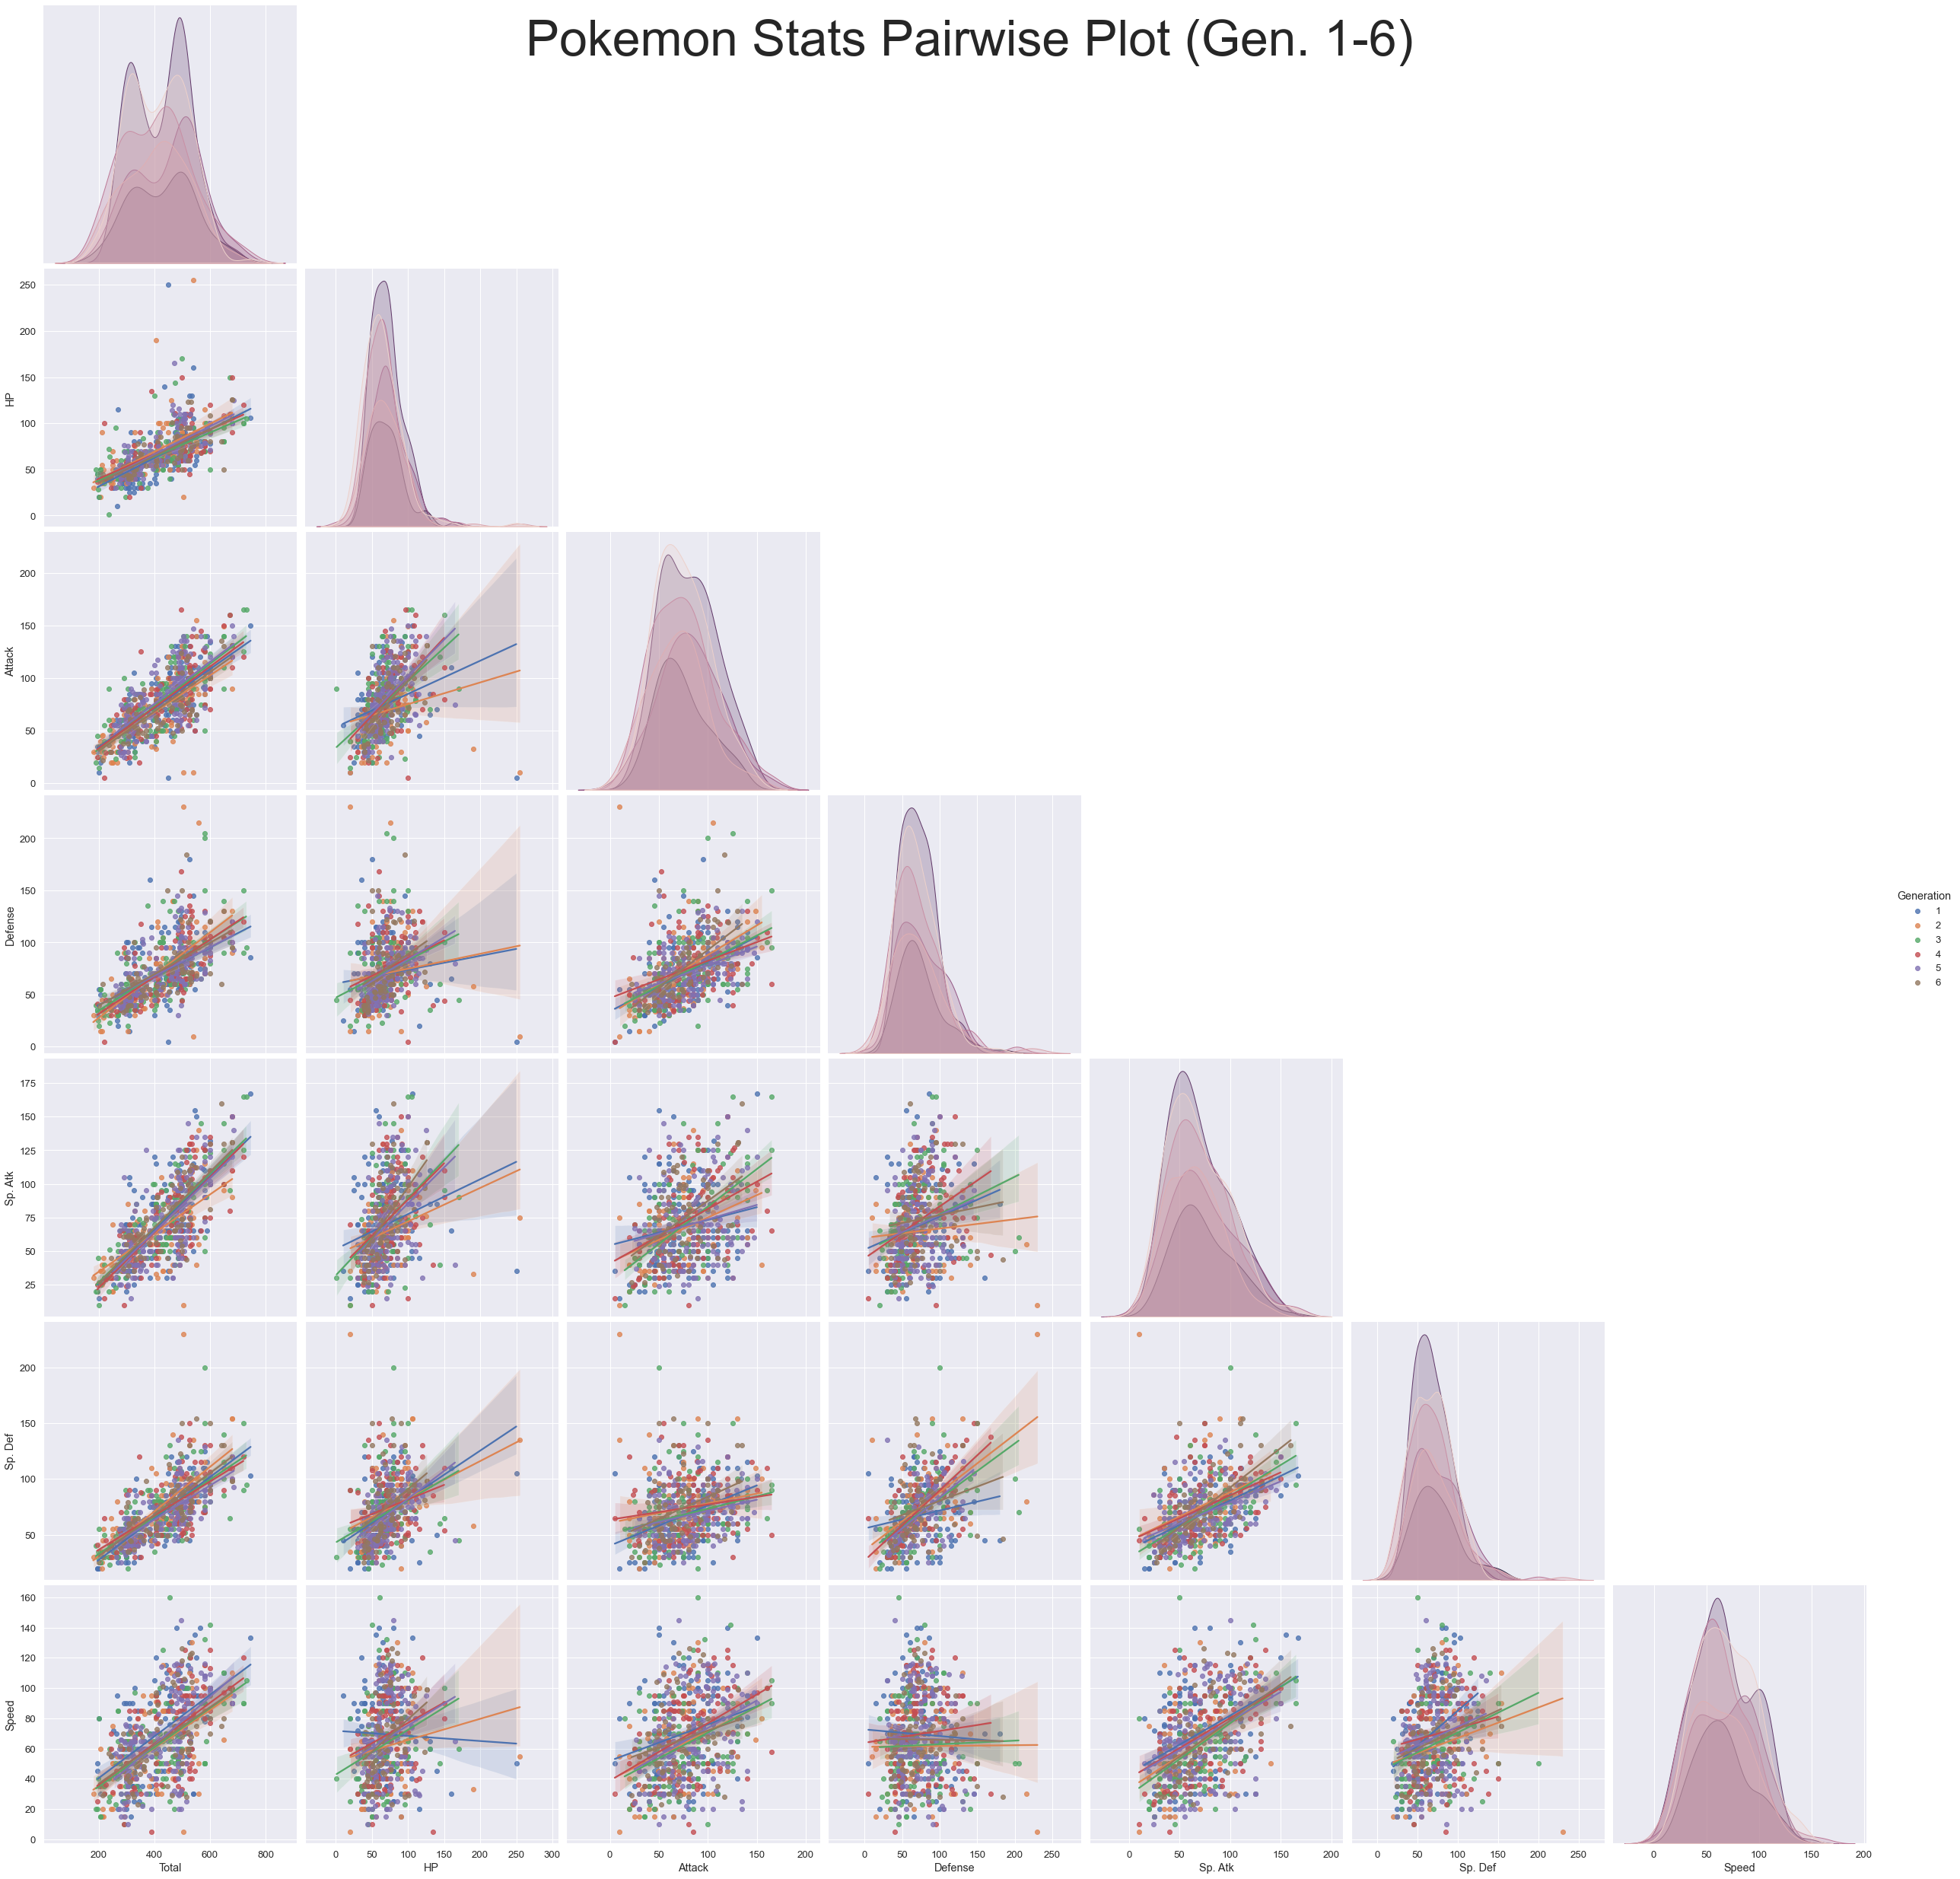

In [12]:
# Plot
plt.figure(figsize=(22,22), dpi= 500)
## Learned: Subplot height controls size of fig!
#sns.color_palette("hls", 8)
# ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def','Speed','Generation','Legendary']

pair_plot = sns.pairplot(cleaned_data[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def','Speed','Generation']], hue='Generation', kind = 'reg', height=5, corner = True)
pair_plot.fig.suptitle(f"Pokemon Stats Pairwise Plot (Gen. 1-6)", fontsize=66)
#plt.title(f"Pokemon Stats Pairwise Plot (Gen. 1-6)", fontsize=24)
plt.savefig('Pokemon_Stats_Pairwise_Plot', dpi='figure', bbox_inches='tight')

## Conclusions

1. There is stat inflation between generations 1-6, therefor the generations are not balanced.
Future Work: How rare Pokemon are has not been considered. Perhaps the stronger Pokemon of later generations are more rare, meaning the mean pokemon by probability of each generation might be balanced.

2. Pokemon are not balanced between the "Type 1" characteristic (Fire/Grass/Dragon etc..)
Dragon was the strongest Type, while bug was the weakest.

Exploratory data analysis:
- From the Pairplot it can be seen that there are no strong relations between any variable. In general: "If a Pokemon's stat is high, it is likely all its other stats are high as well". I expected Pokemon with high "Attack" to have low "Defense", but it seems the opposite is true.
